In [1]:
import numpy as np
import pandas as pd
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv("spam.csv")

df.head(100)

,text,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
95,Your free ringtone is waiting to be collected....,1
96,Watching telugu movie..wat abt u?,0
97,i see. When we finish we have loads of loans t...,0
98,Hi. Wk been ok - on hols now! Yes on for a bit...,0


In [3]:
#df.head(10)
df.head(5)

,text,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['text', 'spam'], dtype='object')

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5169, 2)

In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Sathvika
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def process(text):
    nopunc=[]
    clean_words=[]
    for ch in text:
        if ch not in string.punctuation:
            nopunc.append(ch)
    remove_punc=''.join(nopunc)
    for word in remove_punc.split():
        if word.lower() not in stopwords.words('english'):
            clean_words.append(word)
    return clean_words
    

In [10]:
df['text'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=process)
bow_transformer = vectorizer.fit(df['text']) 
messages_bow = bow_transformer.transform(df['text'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(messages_bow, df['spam'], test_size = 0.30, random_state = 0)

In [13]:
messages_bow.shape

(5169, 11302)

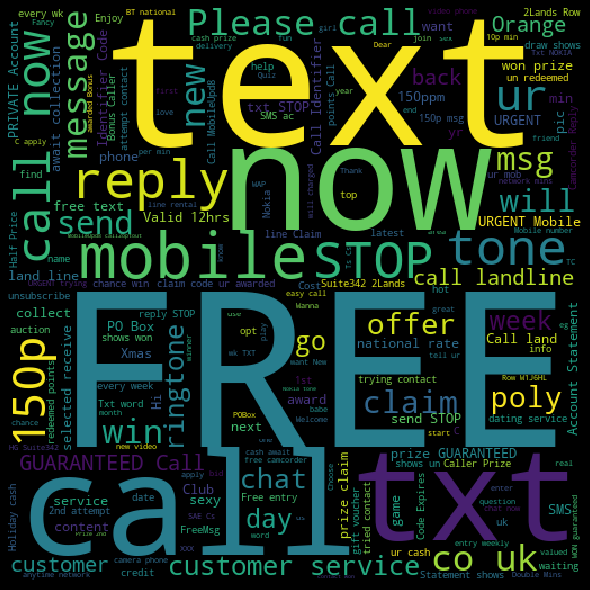

In [14]:
spam_words=' '.join(list(df[df['spam']==1]['text']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

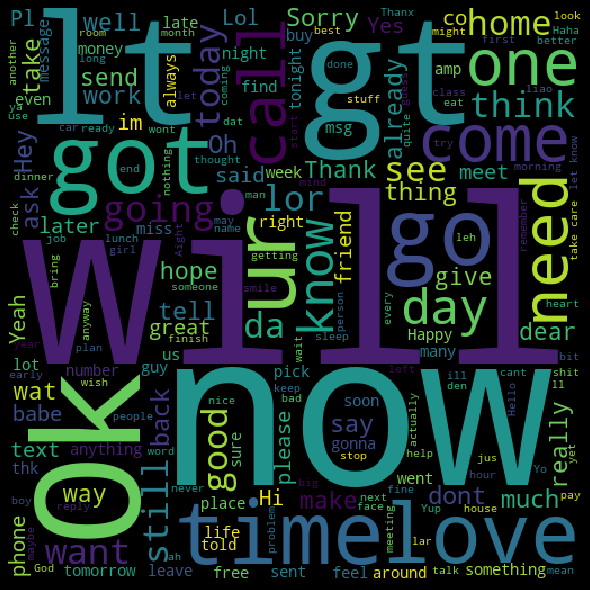

In [15]:
ham_words=' '.join(list(df[df['spam']==0]['text']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train, Y_train)

In [17]:
print(classifier.predict(X_train))

[0 0 0 ... 0 0 0]


In [18]:
print(Y_train)

4163    0
2253    0
1309    0
1046    0
3521    0
       ..
5307    0
3455    0
1708    0
2730    0
2871    0
Name: spam, Length: 3618, dtype: int64


In [19]:
X_train.shape

(3618, 11302)

In [20]:
Y_train.shape

(3618,)

In [21]:
X_test.shape

(1551, 11302)

In [22]:
Y_test.shape

(1551,)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predict_data=classifier.predict(X_train)
print(classification_report(Y_train, predict_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3174
           1       0.99      0.98      0.98       444

    accuracy                           1.00      3618
   macro avg       0.99      0.99      0.99      3618
weighted avg       1.00      1.00      1.00      3618



In [24]:
print("Confusion Matrix :",confusion_matrix(Y_train,predict_data))

Confusion Matrix : [[3168    6]
 [   9  435]]


In [25]:
print("Accuracy:",accuracy_score(Y_train,predict_data))

Accuracy: 0.9958540630182421


In [26]:
print(classifier.predict(X_test))
print(Y_test)
print(Y_test.values)

[0 0 0 ... 0 0 1]
1851    0
2375    0
2743    0
3324    0
3995    0
       ..
1429    1
1423    0
4780    0
4085    0
1500    0
Name: spam, Length: 1551, dtype: int64
[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predict_data=classifier.predict(X_test)
print(classification_report(Y_test, predict_data))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1342
           1       0.79      0.92      0.85       209

    accuracy                           0.96      1551
   macro avg       0.89      0.94      0.91      1551
weighted avg       0.96      0.96      0.96      1551



In [28]:
print("Confusion Matrix :",confusion_matrix(Y_test,predict_data))

Confusion Matrix : [[1291   51]
 [  17  192]]


In [29]:
print("Accuracy:",accuracy_score(Y_test,predict_data))

Accuracy: 0.9561573178594455
